## Predicting Student Success Rate

Steps:
- Visualize and understand data

In [57]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [70]:
# Read in data and see features
df = pd.read_csv('data.csv', sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [65]:
# Create X matrix and y vector
df_arr = df.to_numpy()
X = df_arr[:, :-1]
X = StandardScaler().fit_transform(X) # Standardizes features with 0 mean and unit variance
y = df_arr[:, -1]
display(y)

# Reformat label with dropout as 0 and graduate as 1
target_names = {0:'Dropout', 1:'Graduate'}
y = y == "Graduate"
y = y.astype(int)
y

array(['Dropout', 'Graduate', 'Dropout', ..., 'Dropout', 'Graduate',
       'Graduate'], dtype=object)

array([0, 1, 0, ..., 0, 1, 1])

<AxesSubplot:>

c:\Users\btrea\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


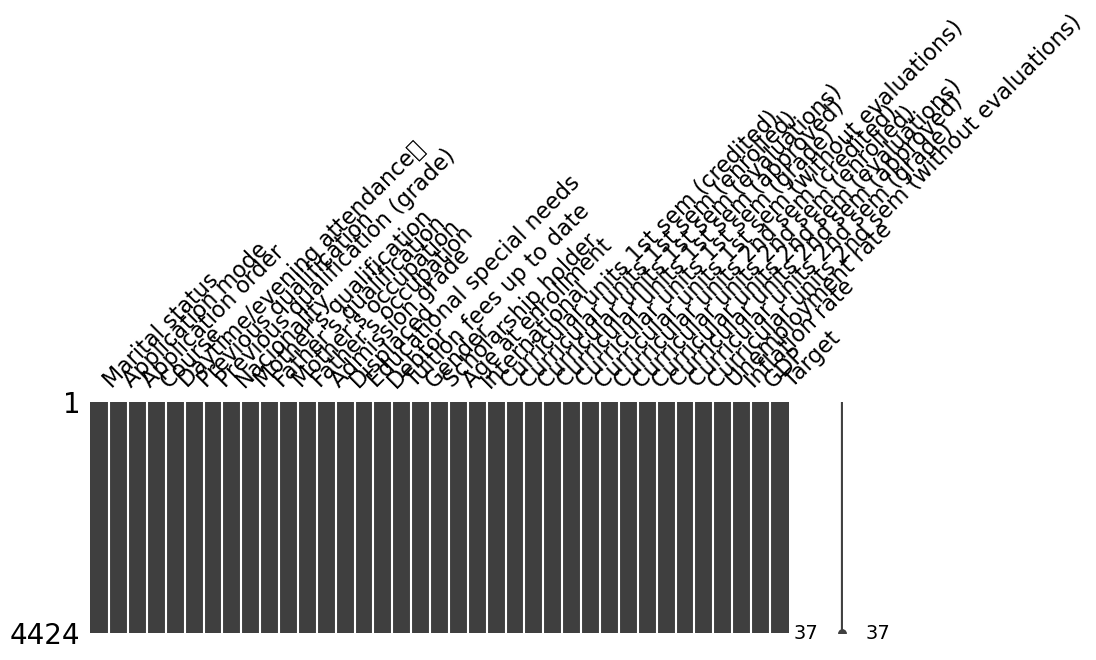

In [60]:
# Missing data detection
msno.matrix(df, figsize = (10,3))

We can see that there are no null entries as all the columns are equally popualted.

- Next, use Principal Component Analysis (PCA) for dimensionality reduction

    We'll try reducing the 36 original features down to 10

Shape before PCA:  (4424, 36)
Shape after PCA:  (4424, 10)


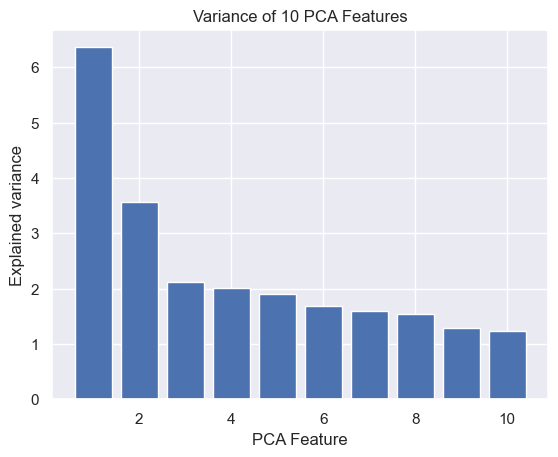

In [77]:
# PCA With 10 Features
pca_10 = decomposition.PCA(n_components=10)
pca_10.fit(X)
X_10 = pca_10.transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', X_10.shape)

# Determine variance of the 10 Principal Components (PCs) created by PCA
pca_10.explained_variance_
plt.bar(range(1,len(pca_10.explained_variance_)+1), pca_10.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Variance of 10 PCA Features')
plt.show()

From this, we can see that the first 2 features seem to be the most informative, so let's perform PCA with 2 features

In [62]:
# PCA With 2 Features
pca_2 = decomposition.PCA(n_components=2)
pca_2.fit(X)
X_2 = pca_2.transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', X_2.shape)

Shape before PCA:  (4424, 36)
Shape after PCA:  (4424, 2)


Now lets plot the data after PCA

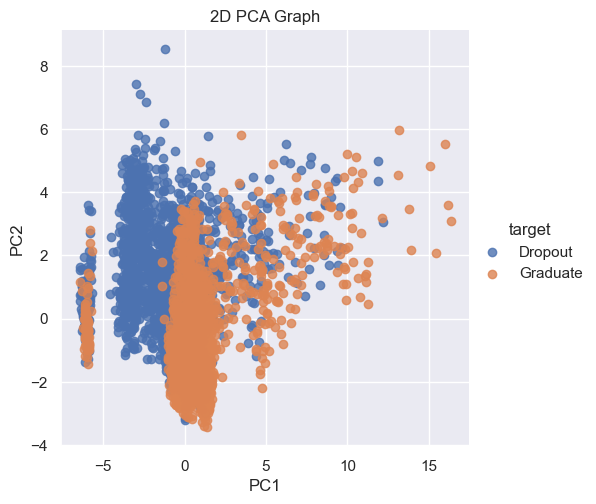

In [74]:
sns.set()
pca_df = pd.DataFrame(data=X_2, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True)
 
plt.title('2D PCA Graph')
plt.show()

Let's see how different features are being taken into account with each principal component

In [69]:
# Principal components correlation coefficients
loadings = pca_2.components_
 
# Number of features before PCA
n_features = pca_2.n_features_
 
# Feature names before PCA
feature_names = df.columns[:-1]
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
Marital status,0.015903,0.250061
Application mode,0.058235,0.358510
Application order,-0.014681,-0.225391
Course,0.131837,-0.038926
Daytime/evening attendance\t,-0.018218,-0.250187
Previous qualification,0.045046,0.170643
Previous qualification (grade),-0.000820,-0.065225
Nacionality,-0.008547,-0.006472
Mother's qualification,0.017530,0.161986
